In [6]:
from pycaret.datasets import get_data

In [9]:
df = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


# Tipos de amostragem
* Amostragem Aleatória Simples: todo individuo tem probabilidade igual de ser selecionado
* Amostragem Sistemática: selecionamos individuos baseado em um sistema, ideal para quando não conhecemos o tamanho da população
* Amostragem Estratificada: Criamos grupos como idade, localização, gênero etc, para que selecionemos individuos aleatóriamenete dentro dos grupos
* Amostragem por Conglomerado: Dividimos em conglomerados, como escolas, bairros etc, selecionamos individuos dentro desses conglomerados

In [15]:
df['satisfaction_level'].mean()

0.6128335222348156

In [16]:
df['satisfaction_level'].std()

0.24863065106114257

In [13]:
# Amostra aleatória simples com pandas
amostra = df.sample(20)

In [17]:
amostra['satisfaction_level'].mean()

0.5799999999999998

In [18]:
amostra['satisfaction_level'].std()

0.22292316353870734

# Intervalo de confiança
O nível de confiança é uma medida de quão confiante estamos em nossas inferências estatísticas. Ele está relacionado aos intervalos de confiança, que são faixas de valores em torno de uma estimativa de um parâmetro populacional (como a média ou proporção) dentro dos quais temos um certo grau de confiança de que o valor real do parâmetro se encontra.

Intervalo de Confiança = Média da Amostra ± Z* (Erro Padrão)


In [35]:
import math
import seaborn as sns

erro_padrao = amostra['satisfaction_level'].std() / math.sqrt(30)

intervalo_de_confianca_pos = (amostra['satisfaction_level'].mean() + (1.96 * erro_padrao))
intervalo_de_confianca_neg = (amostra['satisfaction_level'].mean() - (1.96 * erro_padrao))

In [36]:
print(intervalo_de_confianca_pos, intervalo_de_confianca_neg)

0.6597720295702345 0.5002279704297652


Podemos ver visualmente no gráfico abaixo onde a linha azul é nossa média da população real e as vermelhas os limites da média estipulados baseados na amostra, que o intervalo de confiança engloba a média real.

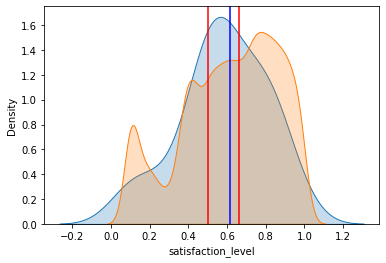

In [38]:
sns.kdeplot(data=amostra, x='satisfaction_level', fill=True)

plt.axvline(intervalo_de_confianca_pos, color='red')
plt.axvline(intervalo_de_confianca_neg, color='red')

sns.kdeplot(data=df, x='satisfaction_level', fill=True)
plt.axvline(df['satisfaction_level'].mean(), color='blue')

plt.show()

# Teorema do limite central
O calculo do intervalo de confiança é baseado no TLC (teorema do limite central) o TLC afirma que, se tomarmos várias amostras aleatórias da população e calcularmos a média de cada uma dessas amostras, a distribuição dessas médias tende a se aproximar da distribuição normal à medida que o tamanho da amostra aumenta. Exemplo de usos:

* estimação de paramêtros da população
* testes de hipoteses
* analise financeira
* previsao de eventos

### Ex 1:
Se a média de vendas diárias de uma amostra de 30 dias for de $10.000, com um desvio padrão de $2.000, podemos calcular a margem de erro usando a fórmula:

Margem de erro = Z * Desvio padrão / raiz quadrada do tamanho da amostra

Onde Z é o valor crítico da distribuição normal padrão para o nível de confiança desejado. Por exemplo, se desejarmos um nível de confiança de 95%, Z será igual a 1,96.

Substituindo os valores, temos:

Margem de erro = 1,96 * 2.000 / raiz quadrada de 30
Margem de erro = 712,28

Isso significa que a média populacional de vendas diárias está dentro do intervalo de confiança de $9.287,72 a $10.712,28 com um nível de confiança de 95%.

### Ex 2: 
Suponha que um meteorologista deseje determinar a probabilidade de que chova em uma determinada cidade em 1º de julho. O meteorologista pode usar dados históricos para determinar a distribuição de dias chuvosos que ocorrem nessa época do ano e usar o TLC para determinar a probabilidade de que chova em 1º de julho.

Usando o Teorema do Limite Central, podemos inferir a distribuição populacional com base na distribuição normal aproximada das proporções amostrais. Se a proporção de dias chuvosos em julho for de 30%, com um desvio padrão de 0,02, podemos calcular a probabilidade de que chova em 1º de julho usando a fórmula:

Probabilidade = Z * Desvio padrão + Média

Onde Z é o valor crítico da distribuição normal padrão para a probabilidade desejada. Por exemplo, se desejarmos uma probabilidade de 80%, Z será igual a 0,84.

Substituindo os valores, temos:

Probabilidade = 0,84 * 0,02 + 0,30
Probabilidade = 0,336 + 0,30
Probabilidade = 0,636

Isso significa que a probabilidade de chover em 1º de julho é de aproximadamente 64% com base nos dados históricos disponíveis.

### Ex 3: 
Suponha que um novo tratamento foi desenvolvido para uma doença e um ensaio clínico é realizado para comparar sua eficácia com o tratamento atual. Um grupo de pacientes é selecionado aleatoriamente para receber o novo tratamento e outro grupo de pacientes recebe o tratamento atual. Os resultados dos dois grupos são comparados usando uma medida de resultado, como a redução da pressão arterial.

Usando o Teorema do Limite Central, podemos inferir a diferença média entre os grupos com base na distribuição normal aproximada das diferenças de médias amostrais. Se a diferença média na redução da pressão arterial entre os dois grupos for de 5 pontos, com um desvio padrão de 2 pontos, podemos realizar um teste t de Student para determinar se a diferença é estatisticamente significativa.

Podemos calcular o valor t usando a fórmula:

t = (Diferença média - Hipótese nula) / (Desvio padrão / raiz quadrada do tamanho da amostra)

Onde Diferença média é a diferença média observada na amostra, a Hipótese nula é a diferença média esperada se não houver diferença entre os tratamentos, o Desvio padrão é o desvio padrão da diferença média na população e o tamanho da amostra é o tamanho de cada grupo de pacientes.

Se o valor t calculado for maior do que o valor crítico t para o nível de significância desejado e os graus de liberdade apropriados, podemos rejeitar a hipótese nula e concluir que há uma diferença significativa entre os tratamentos.

### Ex 4:
Suponha que a fábrica de refrigerantes deseje garantir que a espessura das latas produzidas esteja dentro dos limites de tolerância especificados. Para realizar essa verificação, a fábrica pode medir a espessura de uma amostra aleatória de latas e usar o TLC para determinar se a média das espessuras está dentro dos limites de tolerância.

Usando o Teorema do Limite Central, podemos inferir a média populacional com base na distribuição normal aproximada das médias amostrais. Se a média da espessura de uma amostra de 50 latas for de 0,4 mm, com um desvio padrão de 0,02 mm, podemos calcular a margem de erro usando a fórmula:

Margem de erro = Z * Desvio padrão / raiz quadrada do tamanho da amostra

Onde Z é o valor crítico da distribuição normal padrão para o nível de confiança desejado. Por exemplo, se desejarmos um nível de confiança de 95%, Z será igual a 1,96.

Substituindo os valores, temos:

Margem de erro = 1,96 * 0,02 / raiz quadrada de 50
Margem de erro = 0,006

Isso significa que a média populacional de espessura das latas está dentro do intervalo de confiança de 0,394 mm a 0,406 mm com um nível de confiança de 95%.

# Testes de hipotese
Teste de hipótese é uma técnica estatística utilizada para avaliar a validade de uma afirmação sobre uma população com base em uma amostra.

* Test-t: Usado para comparar as médias de duas amostras e determinar se as diferenças entre essas médias são estatisticamente significativas.
* Test-z: Usado para comparar uma média amostral com uma <b>média populacional conhecida</b> e determinar se as diferenças entre essas médias são estatisticamente significativas.
* Test chi2: Usado para comparar a distribuição observada de uma <b>variável categórica</b> com a distribuição esperada e determinar se as diferenças entre as duas distribuições são estatisticamente significativas.
* ANOVA: Usado para comparar as médias de três ou mais grupos e determinar se as diferenças entre essas médias são estatisticamente significativas ou podem ser explicadas por variações aleatórias.
* Test de Mann-Whitney: É uma técnica estatística usada para comparar a distribuição de duas amostras independentes e determinar se as diferenças entre essas distribuições são estatisticamente significativas. O teste de Mann-Whitney é frequentemente usado quando as amostras <b>não seguem uma distribuição normal</b> ou quando as variâncias das duas amostras não são iguais.

### Test-t

Comparando duas amostras (o valor da estatística t indica a diferença entre as duas médias em unidades de desvio padrão. Quanto maior o valor de t, maior a diferença entre as médias e mais provável que as diferenças sejam significativas. O valor de p indica a probabilidade de obter uma diferença tão grande entre as médias de duas amostras, assumindo que as duas amostras são provenientes da mesma população. Se o valor de p for menor do que o nível de significância escolhido (geralmente 0,05), podemos concluir que as diferenças entre as médias são significativas.)

In [43]:
import scipy.stats as st

df = get_data('pokemon')

df1 = df[df['Legendary']==False]
df2 = df[df['Legendary']==True]

# Hipotese 0: Pokemons Lendarios tem dano similar a pokemons normais
# Hipotese 1: Pokemons Lendarios tem mais dano

st.ttest_ind(df1['Total'],df2['Total'])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Ttest_indResult(statistic=-16.386116965872425, pvalue=3.0952457469652825e-52)

### chi2
Suponha que temos uma amostra de 1000 pessoas e queremos testar se a preferência por três diferentes marcas de refrigerante é independente da idade. Dividimos a amostra em três grupos etários: jovens (idade entre 18 e 29 anos), adultos (idade entre 30 e 49 anos) e idosos (idade acima de 50 anos). Coletamos dados sobre a preferência por cada marca de refrigerante em cada grupo etário e queremos testar se a preferência por marca é independente da idade. (O valor da estatística Qui-quadrado indica a diferença entre as frequências observadas e as frequências esperadas em unidades de desvio padrão.)

In [41]:
import numpy as np
from scipy.stats import chi2_contingency

np.random.seed(0)

refri1 = [50, 100, 150]
refri2 = [80, 120, 100]
refri3 = [100, 80, 70]

table = np.array([refri1, refri2, refri3])

chi2_stat, p_value, dof, expected = chi2_contingency(table)

print("Estatística Qui-quadrado: ", chi2_stat)
print("Valor p: ", p_value)

Estatística Qui-quadrado:  50.264462560386484
Valor p:  3.179707200204524e-10


### test-z

Comparando se um amostra se assemelha a uma população conhecida, nesse caso iremos gerar dados de uma distribuição normal e comparar se essa distribuição se assemelha a distribuição normal. (Se o p-value é maior que 0.05 aceitamos como uma distribuição normal)

In [53]:
from scipy.stats.mstats import normaltest
normal_distribuition = np.random.normal(10,2.5,100)
normaltest(normal_distribuition)

NormaltestResult(statistic=3.6314320880353796, pvalue=0.1627213510151267)

### Test de Mann-Whitney
Suponha que você está comparando as pontuações de duas amostras de estudantes em um teste, mas as pontuações não seguem uma distribuição normal. (O valor da estatística U indica a magnitude da diferença entre os ranks das observações nas duas amostras. Quanto maior o valor de U, maior a diferença entre as duas amostras e mais provável que as diferenças sejam significativas.)

In [56]:
import scipy.stats as stats

amostra1 = [75, 80, 85, 90, 95]
amostra2 = [70, 85, 90, 95, 100]

stat, p = stats.mannwhitneyu(amostra1, amostra2)

print("Estatística de teste: ", stat)
print("Valor-p: ", p)


Estatística de teste:  9.5
Valor-p:  0.2990807263417641


### ANOVA
Suponha que você está comparando a precisão de três modelos de classificação diferentes em um conjunto de dados e deseja avaliar se há diferenças significativas na precisão entre os modelos. Você pode usar a ANOVA para comparar as precisões

In [57]:
import scipy.stats as stats

modelo1 = [0.8, 0.9, 0.7, 0.6, 0.8]
modelo2 = [0.7, 0.8, 0.9, 0.7, 0.8]
modelo3 = [0.9, 0.8, 0.7, 0.9, 0.8]

stat, p = stats.f_oneway(modelo1, modelo2, modelo3)

print("Estatística de teste: ", stat)
print("Valor-p: ", p)


Estatística de teste:  0.5185185185185183
Valor-p:  0.6081547180965303


In [59]:
from statsmodels.stats.multicomp import MultiComparison

df = pd.DataFrame({'model':['rf','rf','rn','rn'],
                   'accuracy':[0.99, 0.98, 0.91, 0.90]})
algoritmos = MultiComparison(df['accuracy'], df['model'])
print(algoritmos.tukeyhsd())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    rf     rn    -0.08 0.0077 -0.1104 -0.0496   True
----------------------------------------------------
